First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 

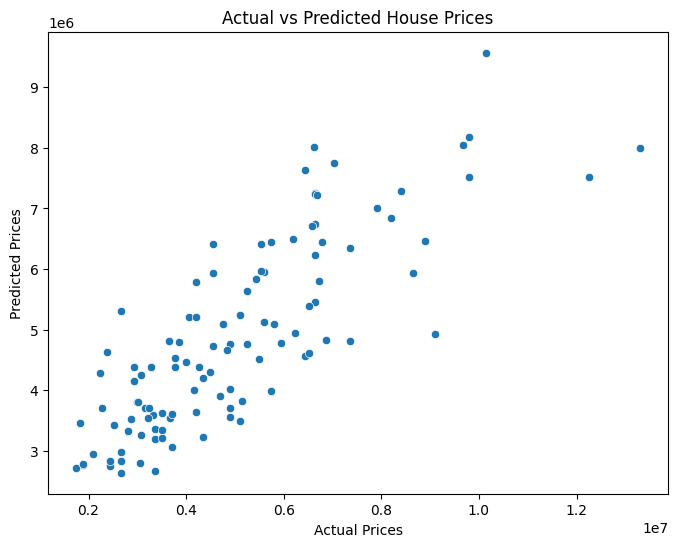


Model Coefficients:
                    Coefficient
area              2.358488e+02
bedrooms          7.857449e+04
bathrooms         1.097117e+06
stories           4.062232e+05
mainroad          3.668242e+05
guestroom         2.331468e+05
basement          3.931598e+05
hotwaterheating   6.878813e+05
airconditioning   7.855506e+05
parking           2.257565e+05
prefarea          6.299017e+05
furnishingstatus -2.103971e+05


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/Housing.csv')
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:\n", coeff_df)
